#**Task 1:**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "/content/dog_bike_car.jpg"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#T1.1 - Edge-based segmentation (Canny Edge Detection)
edges = cv2.Canny(gray, 50, 150)

In [ ]:
#T1.2 - Region-based segmentation
def region_segmentation(image, k=3):
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    _, labels, centers = cv2.kmeans(pixel_values, k, None,
                                    (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2),
                                    10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()].reshape(image.shape)

    return segmented_image

segmented_img = region_segmentation(image, k=3)

In [ ]:
# T1.3 - Hough Transform for Line and Circle Detection
#Hough Line Transform
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 68, minLineLength=15, maxLineGap=250)
line_img = image.copy()

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_img, (x1, y1), (x2, y2), (0, 255, 0), 2)

#Hough Circle Transform
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=5, maxRadius=100)
circle_img = image.copy()

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(circle_img, (i[0], i[1]), i[2], (0, 255, 0), 2)
        cv2.circle(circle_img, (i[0], i[1]), 2, (0, 0, 255), 3)

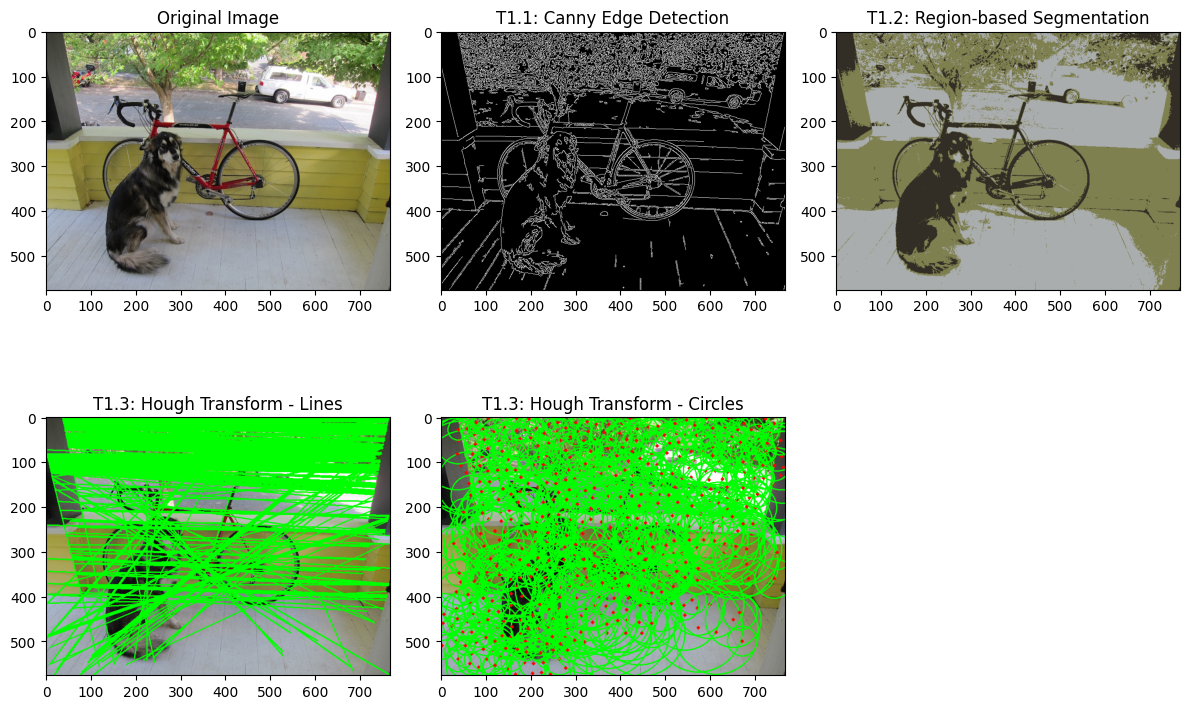

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title("Original Image")
plt.subplot(2, 3, 2), plt.imshow(edges, cmap="gray"), plt.title("T1.1: Canny Edge Detection")
plt.subplot(2, 3, 3), plt.imshow(cv2.cvtColor(segmented_img, cv2.COLOR_BGR2RGB)), plt.title("T1.2: Region-based Segmentation")
plt.subplot(2, 3, 4), plt.imshow(cv2.cvtColor(line_img, cv2.COLOR_BGR2RGB)), plt.title("T1.3: Hough Transform - Lines")
plt.subplot(2, 3, 5), plt.imshow(cv2.cvtColor(circle_img, cv2.COLOR_BGR2RGB)), plt.title("T1.3: Hough Transform - Circles")

plt.tight_layout()
plt.show()

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

#**Task 2.1**


0: 480x640 1 bicycle, 1 car, 1 truck, 1 dog, 266.4ms
Speed: 12.2ms preprocess, 266.4ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


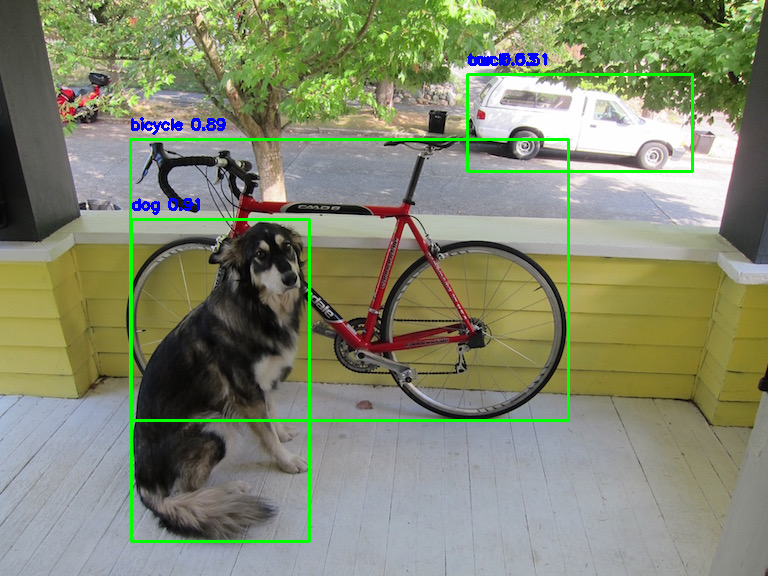

In [ ]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

model = YOLO('yolov8n.pt')

image_path = "/content/dog_bike_car.jpg"

image = cv2.imread(image_path)

results = model(image)

for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        label = result.names[int(box.cls)]
        confidence = box.conf[0].item()

        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, f"{label} {confidence:.2f}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

cv2_imshow(image)

# **Task 2.2**

In [ ]:
!pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 56.1 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from skimage.feature import hog
from skimage import exposure
from skimage.transform import resize

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
def resize_image(image, size=(100, 100)):
    return resize(image, size, anti_aliasing=True)

def extract_hog_features(image):
    fd, hog_image = hog(image, pixels_per_cell=(4, 4), cells_per_block=(2, 2),
                        visualize=True, block_norm='L2-Hys')
    return hog_image

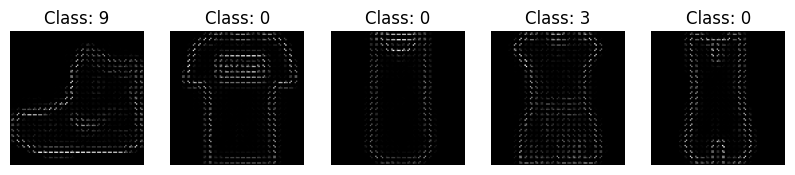

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(5):
    img = train_images[i]
    resized_img = resize_image(img)
    hog_img = extract_hog_features(resized_img)

    plt.subplot(2, 5, i+1)
    plt.imshow(hog_img, cmap='gray')
    plt.title(f"Class: {train_labels[i]}")
    plt.axis("off")

plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 37ms/step - accuracy: 0.7745 - loss: 0.6196 - val_accuracy: 0.8767 - val_loss: 0.3492
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 36ms/step - accuracy: 0.8806 - loss: 0.3190 - val_accuracy: 0.8833 - val_loss: 0.3233
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 37ms/step - accuracy: 0.9018 - loss: 0.2616 - val_accuracy: 0.8982 - val_loss: 0.2792
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 39ms/step - accuracy: 0.9166 - loss: 0.2271 - val_accuracy: 0.8992 - val_loss: 0.2878
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 37ms/step - accuracy: 0.9260 - loss: 0.1987 - val_accuracy: 0.9024 - val_loss: 0.2696
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


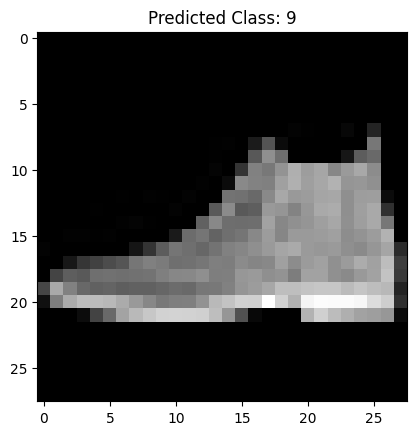

In [ ]:
train_images = train_images.reshape(-1, 28, 28, 1) / 255.0
test_images = test_images.reshape(-1, 28, 28, 1) / 255.0
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

test_image = test_images[0].reshape(1, 28, 28, 1)
prediction = np.argmax(model.predict(test_image))

plt.imshow(test_images[0].reshape(28, 28), cmap="gray")
plt.title(f"Predicted Class: {prediction}")
plt.show()

In [ ]:
!pip install torch torchvision torchaudio
!pip install opencv-python matplotlib numpy
!pip install pytorch-lightning
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 851.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [ ]:
import torch
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator
from torchvision.transforms import functional as F
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import cv2
import matplotlib.pyplot as plt
from torchvision.io import read_image
import os
from torchvision import transforms
import pytorch_lightning as pl
from torchmetrics.detection.mean_ap import MeanAveragePrecision

In [ ]:
class FashionMNISTDetectionDataset(Dataset):
    def __init__(self, root, train=True, transform=None):
        self.fashion_mnist = torchvision.datasets.FashionMNIST(
            root=root, train=train, download=True)
        self.transform = transform
        self.classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                       'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

    def __len__(self):
        return len(self.fashion_mnist)

    def __getitem__(self, idx):
        img, label = self.fashion_mnist[idx]

        # Convert grayscale to RGB (Faster R-CNN expects 3 channels)
        img = img.convert("RGB")

        # Convert to numpy array
        img = np.array(img)

        # Create a simple bounding box that covers the entire image
        # Fashion MNIST images are 28x28, so we'll create a box around it
        boxes = torch.tensor([[0, 0, 27, 27]], dtype=torch.float32)

        # Label for the bounding box (same as classification label)
        labels = torch.tensor([label], dtype=torch.int64)

        target = {}
        target["boxes"] = boxes
        target["labels"] = labels

        if self.transform:
            img = self.transform(img)

        return img, target

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
])

In [ ]:
# Create datasets
train_dataset = FashionMNISTDetectionDataset(root='./data', train=True, transform=transform)
test_dataset = FashionMNISTDetectionDataset(root='./data', train=False, transform=transform)

# Create data loaders
def collate_fn(batch):
    return tuple(zip(*batch))

train_loader = DataLoader(
    train_dataset, batch_size=4, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(
    test_dataset, batch_size=4, shuffle=False, collate_fn=collate_fn)

100%|██████████| 26.4M/26.4M [00:01<00:00, 14.4MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 227kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 4.26MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 8.12MB/s]


In [ ]:
def create_model(num_classes):
    # Load a pre-trained backbone (we'll use a small one for MNIST)
    backbone = torchvision.models.mobilenet_v2(weights='DEFAULT').features
    backbone.out_channels = 1280  # Number of output channels from mobilenet_v2

    # Anchor generator
    anchor_generator = AnchorGenerator(
        sizes=((8, 16, 32, 64, 128),),
        aspect_ratios=((0.5, 1.0, 2.0),)
    )

    # Feature map to perform ROI pooling
    roi_pooler = torchvision.ops.MultiScaleRoIAlign(
        featmap_names=['0'],
        output_size=7,
        sampling_ratio=2
    )

    # Put the pieces together
    model = FasterRCNN(
        backbone,
        num_classes=num_classes,
        rpn_anchor_generator=anchor_generator,
        box_roi_pool=roi_pooler
    )

    return model

num_classes = 10 + 1  # 10 classes + background
model = create_model(num_classes)

Downloading: "https://download.pytorch.org/models/mobilenet_v2-7ebf99e0.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-7ebf99e0.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 37.2MB/s]


In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

# Optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)

# Learning rate scheduler
lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

In [ ]:
num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for images, targets in train_loader:
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        total_loss += losses.item()

    lr_scheduler.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(train_loader)}")

KeyboardInterrupt: 

In [ ]:
def evaluate(model, data_loader, device):
    model.eval()
    metric = MeanAveragePrecision()

    with torch.no_grad():
        for images, targets in data_loader:
            images = list(image.to(device) for image in images)
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

            predictions = model(images)
            metric.update(predictions, targets)

    results = metric.compute()
    return results

# Evaluate on test set
results = evaluate(model, test_loader, device)
print("Test Results:", results)